<a href="https://colab.research.google.com/github/viveksharma-niet/TreeModelUpgrad/blob/main/TreeModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/viveksharma-niet/TreeModelUpgrad/refs/heads/main/heart_v2.csv')

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
X = df.drop('heart disease', axis= 1)
y = df['heart disease']

In [5]:
print(X.head())
print(y.head())

   age  sex   BP  cholestrol
0   70    1  130         322
1   67    0  115         564
2   57    1  124         261
3   64    1  128         263
4   74    0  120         269
0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64


In [6]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [7]:
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [11]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7354497354497355


array([[74, 31],
       [19, 65]])

In [12]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.5432098765432098


array([[22, 23],
       [14, 22]])

In [13]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

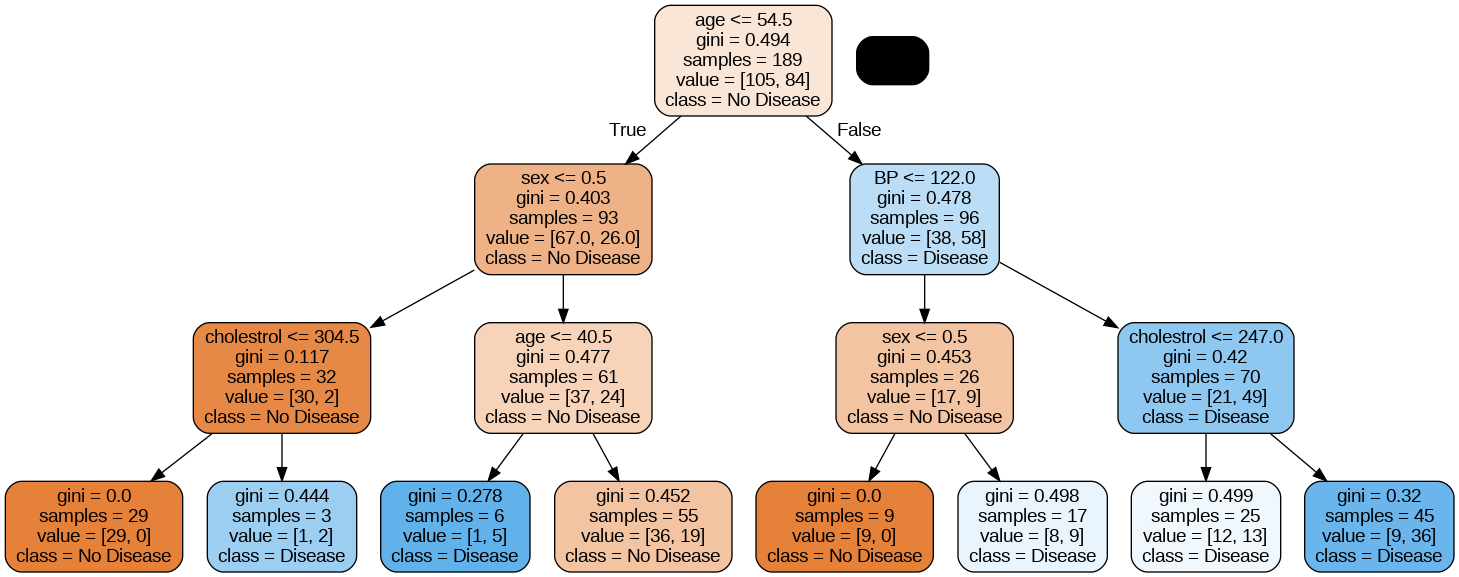

In [14]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns,
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [15]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns,
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [20]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

Without setting any hyper-parameters

In [17]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

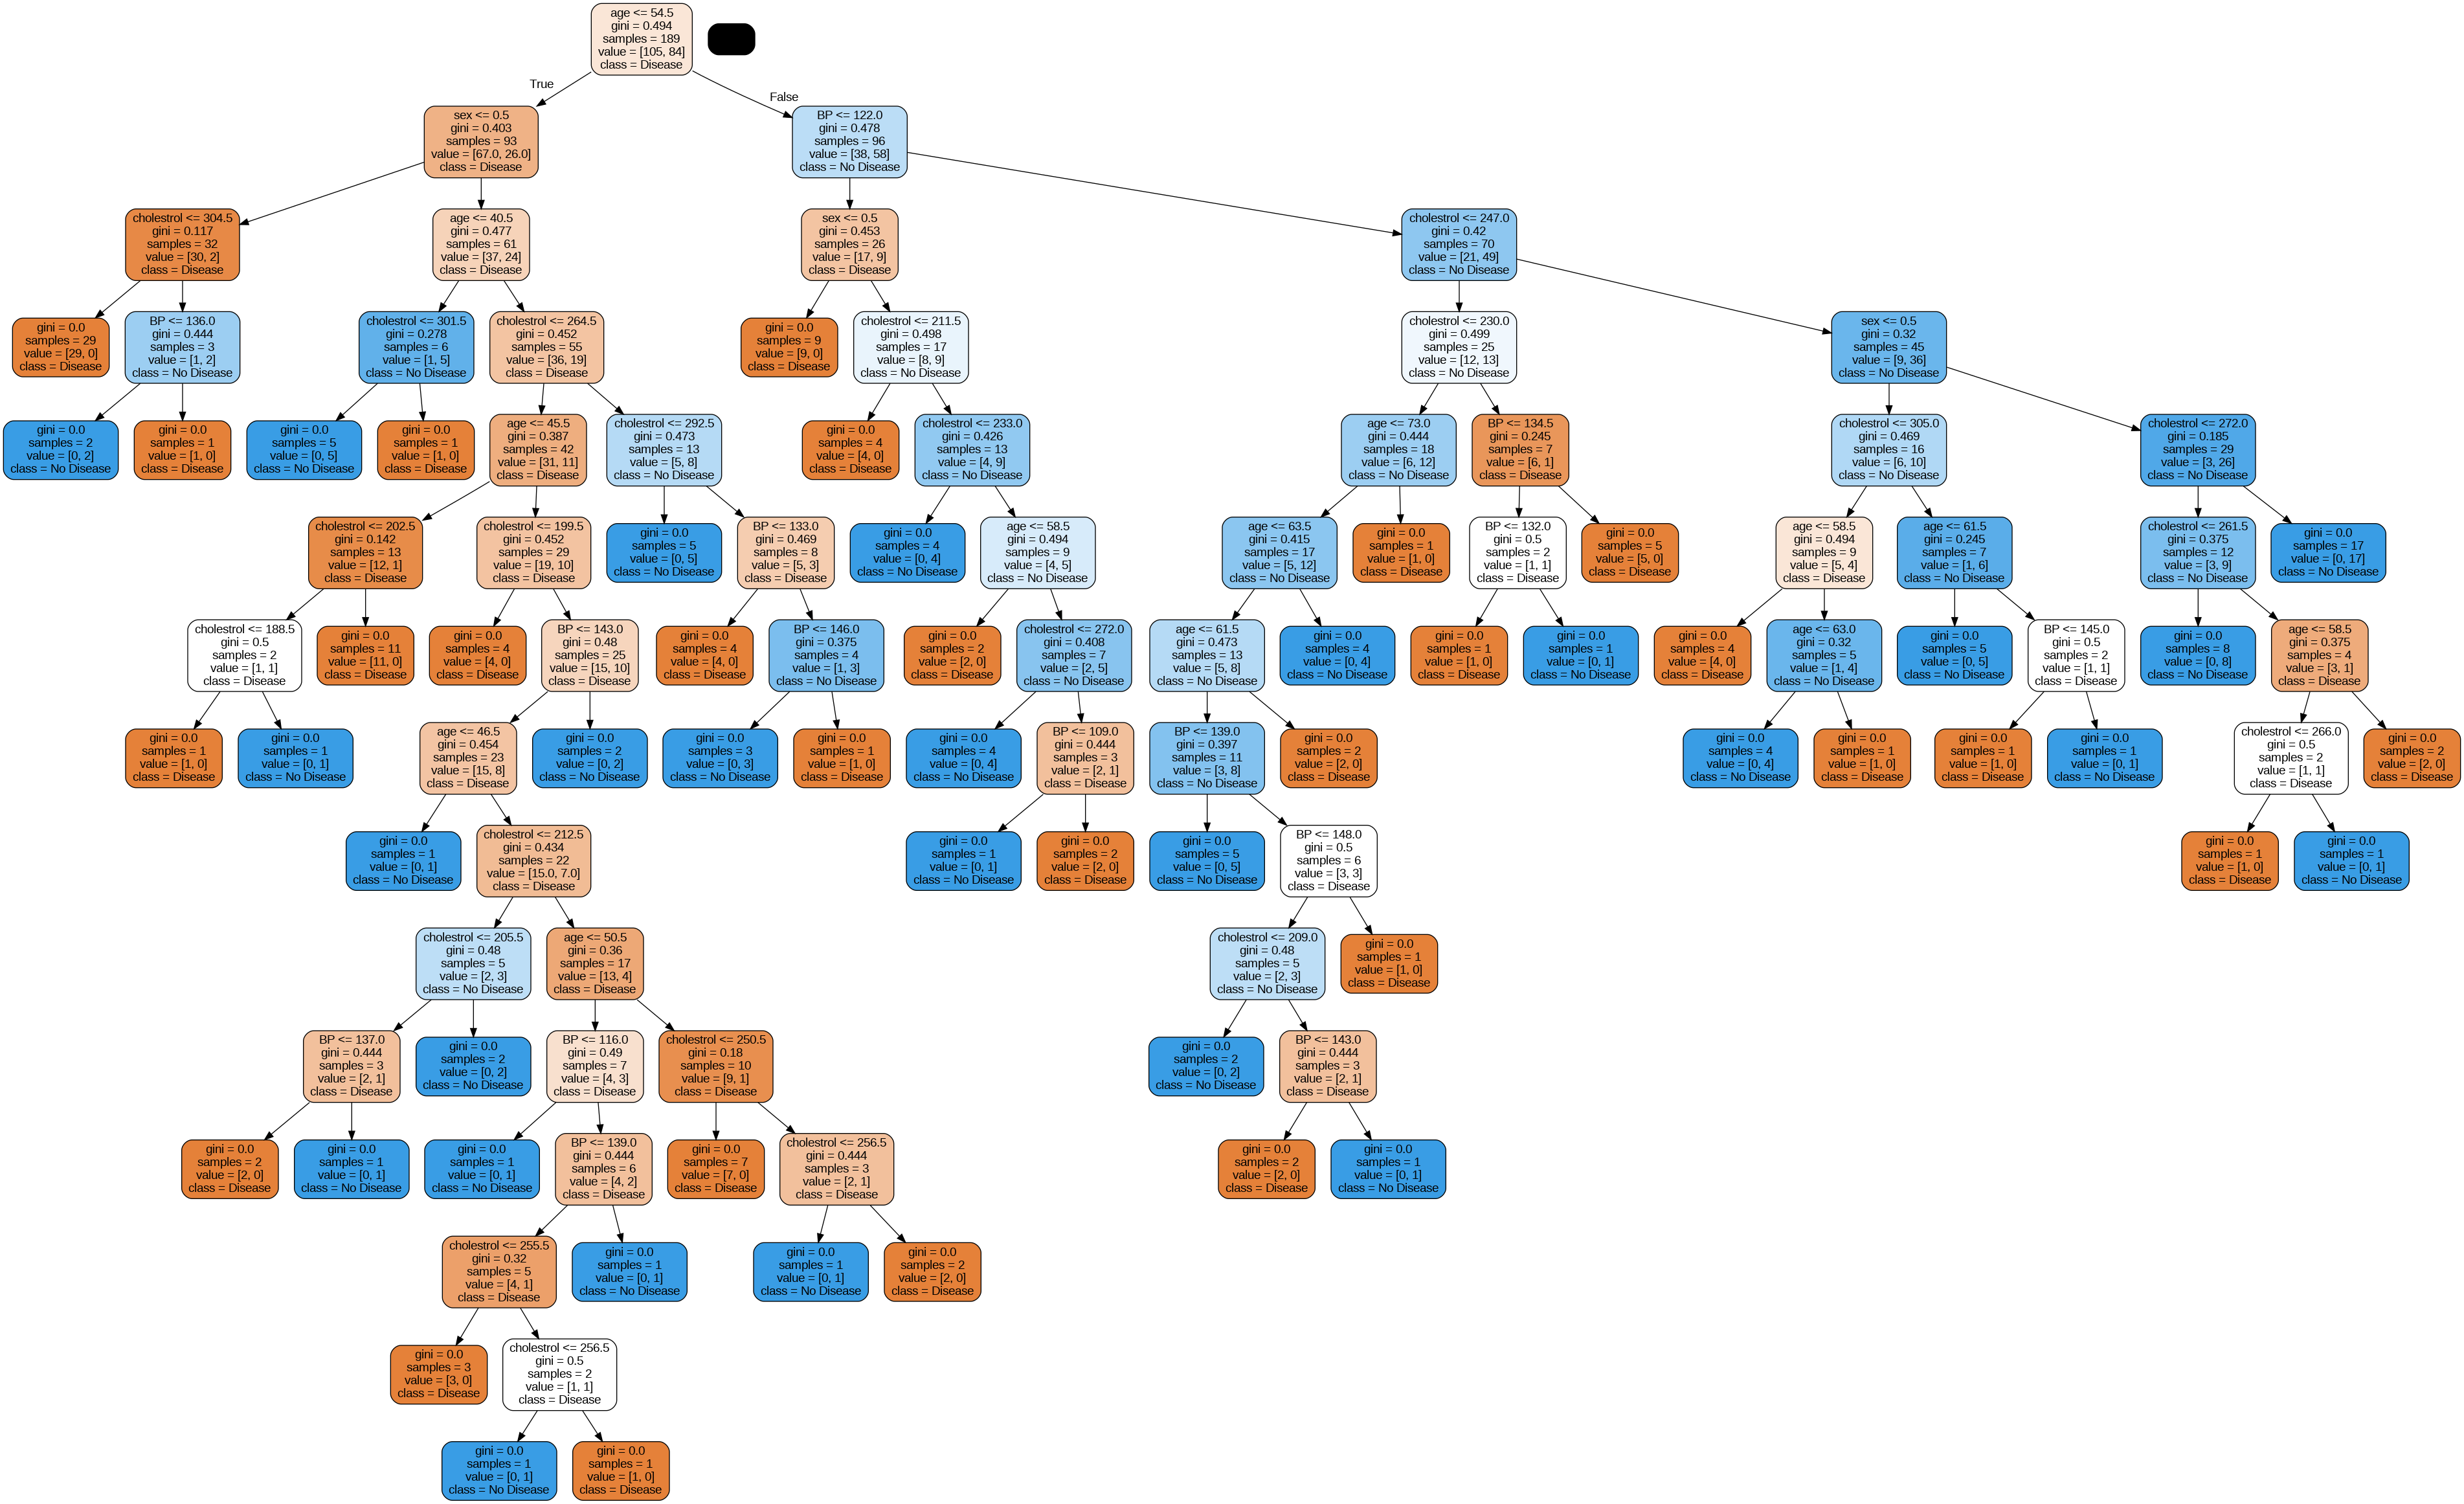

In [18]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [21]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[105   0]
 [  0  84]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[30 15]
 [17 19]]


Controlling the depth of the tree

In [22]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

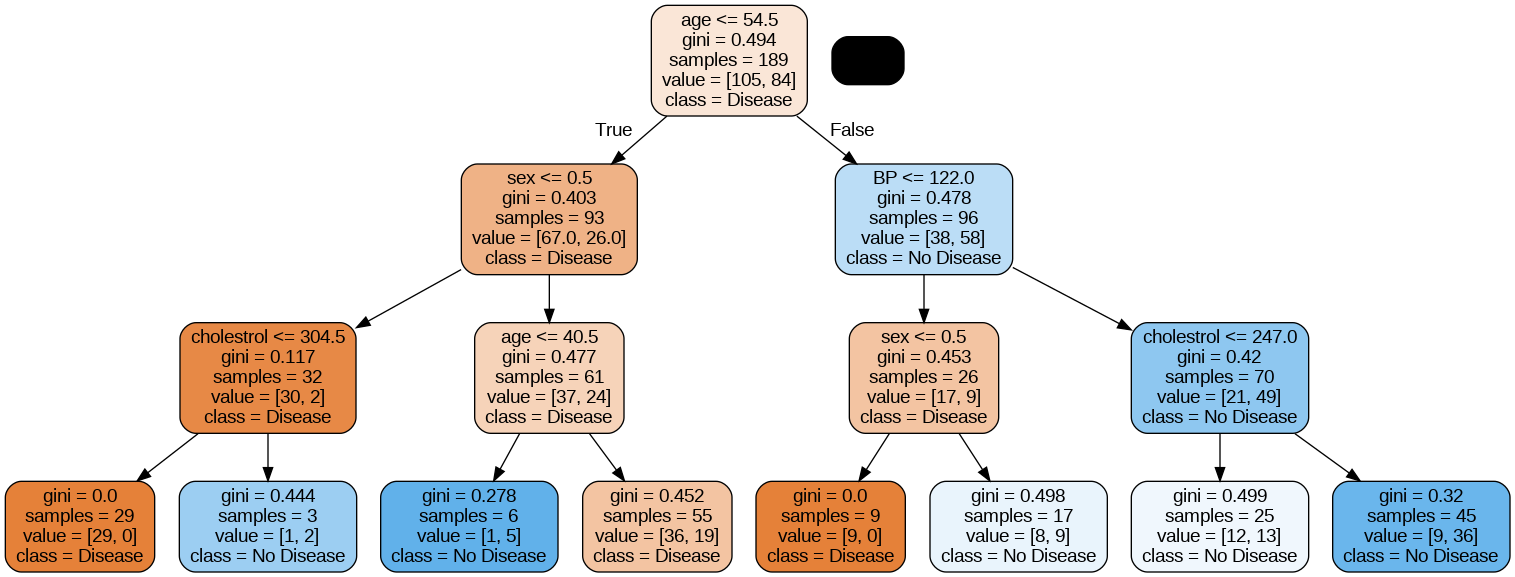

In [24]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [25]:
evaluate_model(dt_depth)

Train Accuracy : 0.7354497354497355
Train Confusion Matrix:
[[74 31]
 [19 65]]
--------------------------------------------------
Test Accuracy : 0.5432098765432098
Test Confusion Matrix:
[[22 23]
 [14 22]]


Specifying minimum samples before split

In [26]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

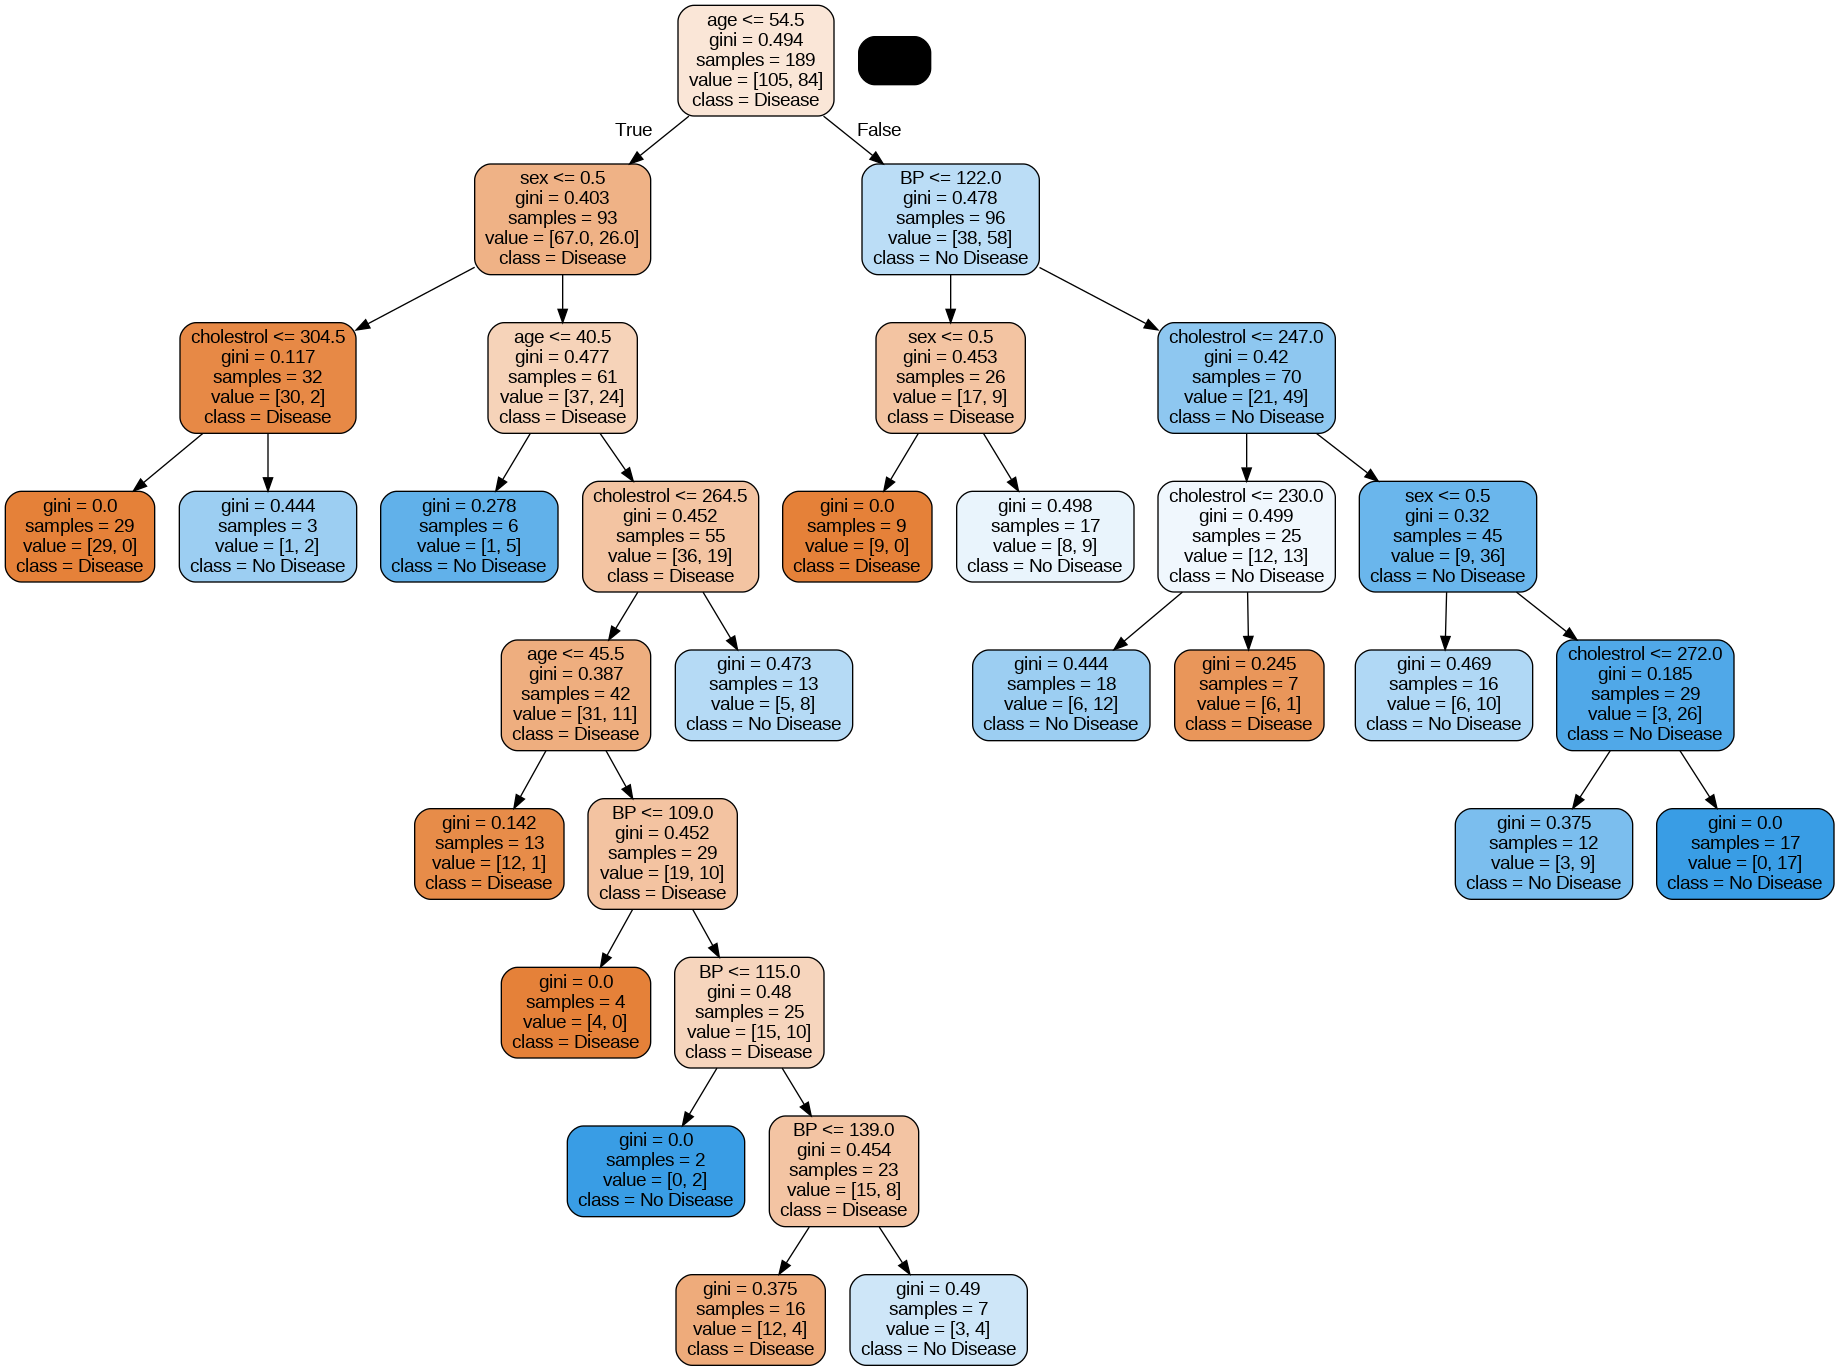

In [27]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [28]:
evaluate_model(dt_min_split)

Train Accuracy : 0.7936507936507936
Train Confusion Matrix:
[[72 33]
 [ 6 78]]
--------------------------------------------------
Test Accuracy : 0.5308641975308642
Test Confusion Matrix:
[[16 29]
 [ 9 27]]


Specifying minimum samples in leaf node

In [29]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

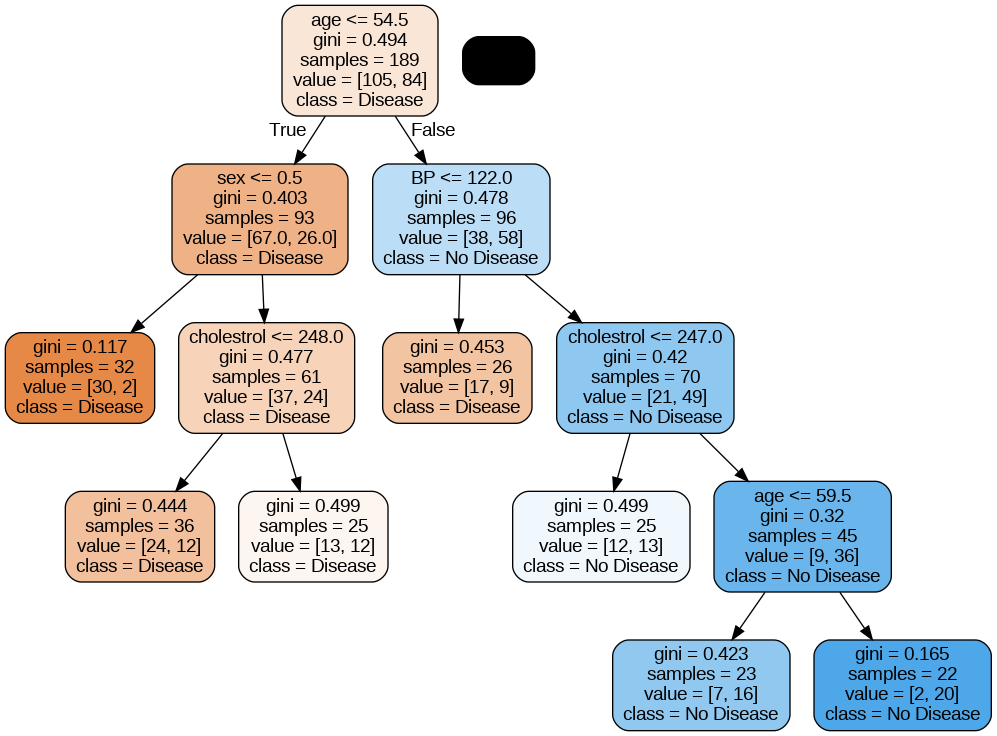

In [30]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [31]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[84 21]
 [35 49]]
--------------------------------------------------
Test Accuracy : 0.5308641975308642
Test Confusion Matrix:
[[27 18]
 [20 16]]


Using Entropy instead of Gini

In [32]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

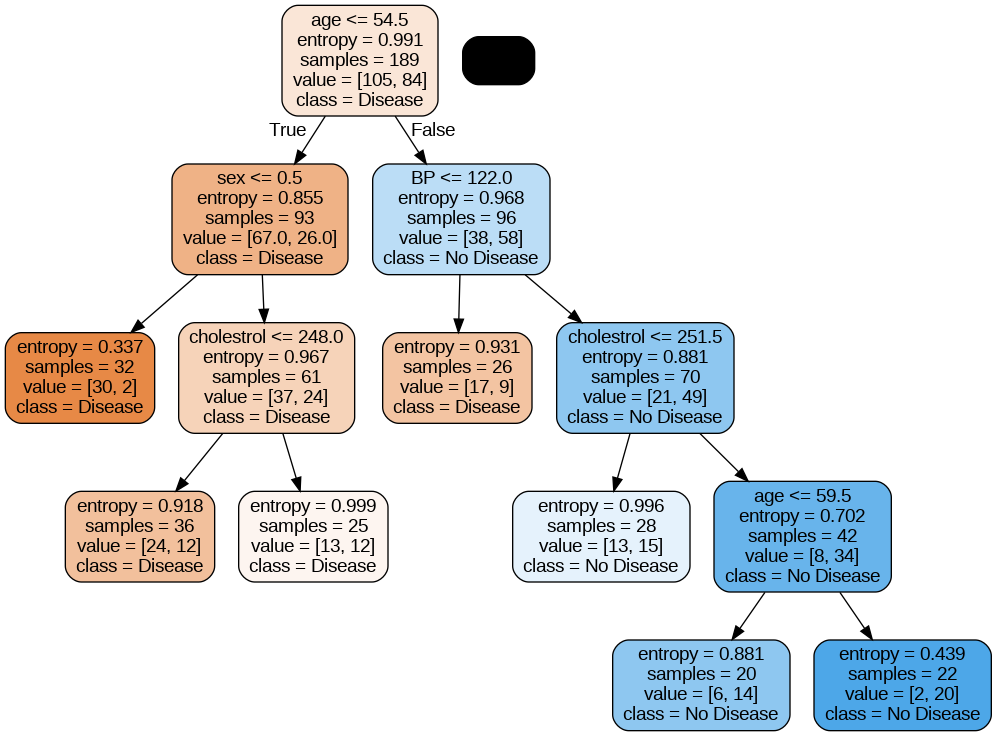

In [33]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [34]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[84 21]
 [35 49]]
--------------------------------------------------
Test Accuracy : 0.5308641975308642
Test Confusion Matrix:
[[27 18]
 [20 16]]


Hyper-parameter tuning

In [35]:
dt = DecisionTreeClassifier(random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Create the parameter grid based on the results of random search
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [38]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [39]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 195 ms, sys: 19.4 ms, total: 214 ms
Wall time: 6.84 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [40]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012659,0.007343,0.007924,0.004373,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.625000,0.553191,0.659574,0.638298,0.619016,0.039955,10
1,0.006924,0.001544,0.004540,0.001936,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.625000,0.595745,0.659574,0.617021,0.624335,0.022985,8
2,0.008457,0.001943,0.005783,0.002395,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.604167,0.574468,0.617021,0.617021,0.603169,0.017382,14
3,0.011960,0.002062,0.009411,0.004236,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.520833,0.574468,0.638298,0.659574,0.598293,0.054597,19
4,0.013621,0.003941,0.013808,0.002355,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.562500,0.553191,0.553191,0.553191,0.555519,0.004031,37


In [41]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
15,0.012293,0.004047,0.010655,0.004237,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.583333,0.702128,0.659574,0.659574,0.651152,0.042836,1
20,0.011791,0.002250,0.008984,0.001677,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.583333,0.702128,0.659574,0.659574,0.651152,0.042836,1
40,0.016154,0.002128,0.011996,0.002463,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.708333,0.595745,0.638298,0.659574,0.650488,0.040540,3
45,0.019833,0.009041,0.012357,0.003675,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.708333,0.595745,0.638298,0.659574,0.650488,0.040540,3
35,0.021816,0.003814,0.011890,0.003927,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.708333,0.531915,0.659574,0.638298,0.634530,0.064456,5


In [42]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [43]:
dt_best = grid_search.best_estimator_

In [44]:
evaluate_model(dt_best)

Train Accuracy : 0.8306878306878307
Train Confusion Matrix:
[[98  7]
 [25 59]]
--------------------------------------------------
Test Accuracy : 0.5555555555555556
Test Confusion Matrix:
[[31 14]
 [22 14]]


In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63        45
           1       0.50      0.39      0.44        36

    accuracy                           0.56        81
   macro avg       0.54      0.54      0.54        81
weighted avg       0.55      0.56      0.55        81



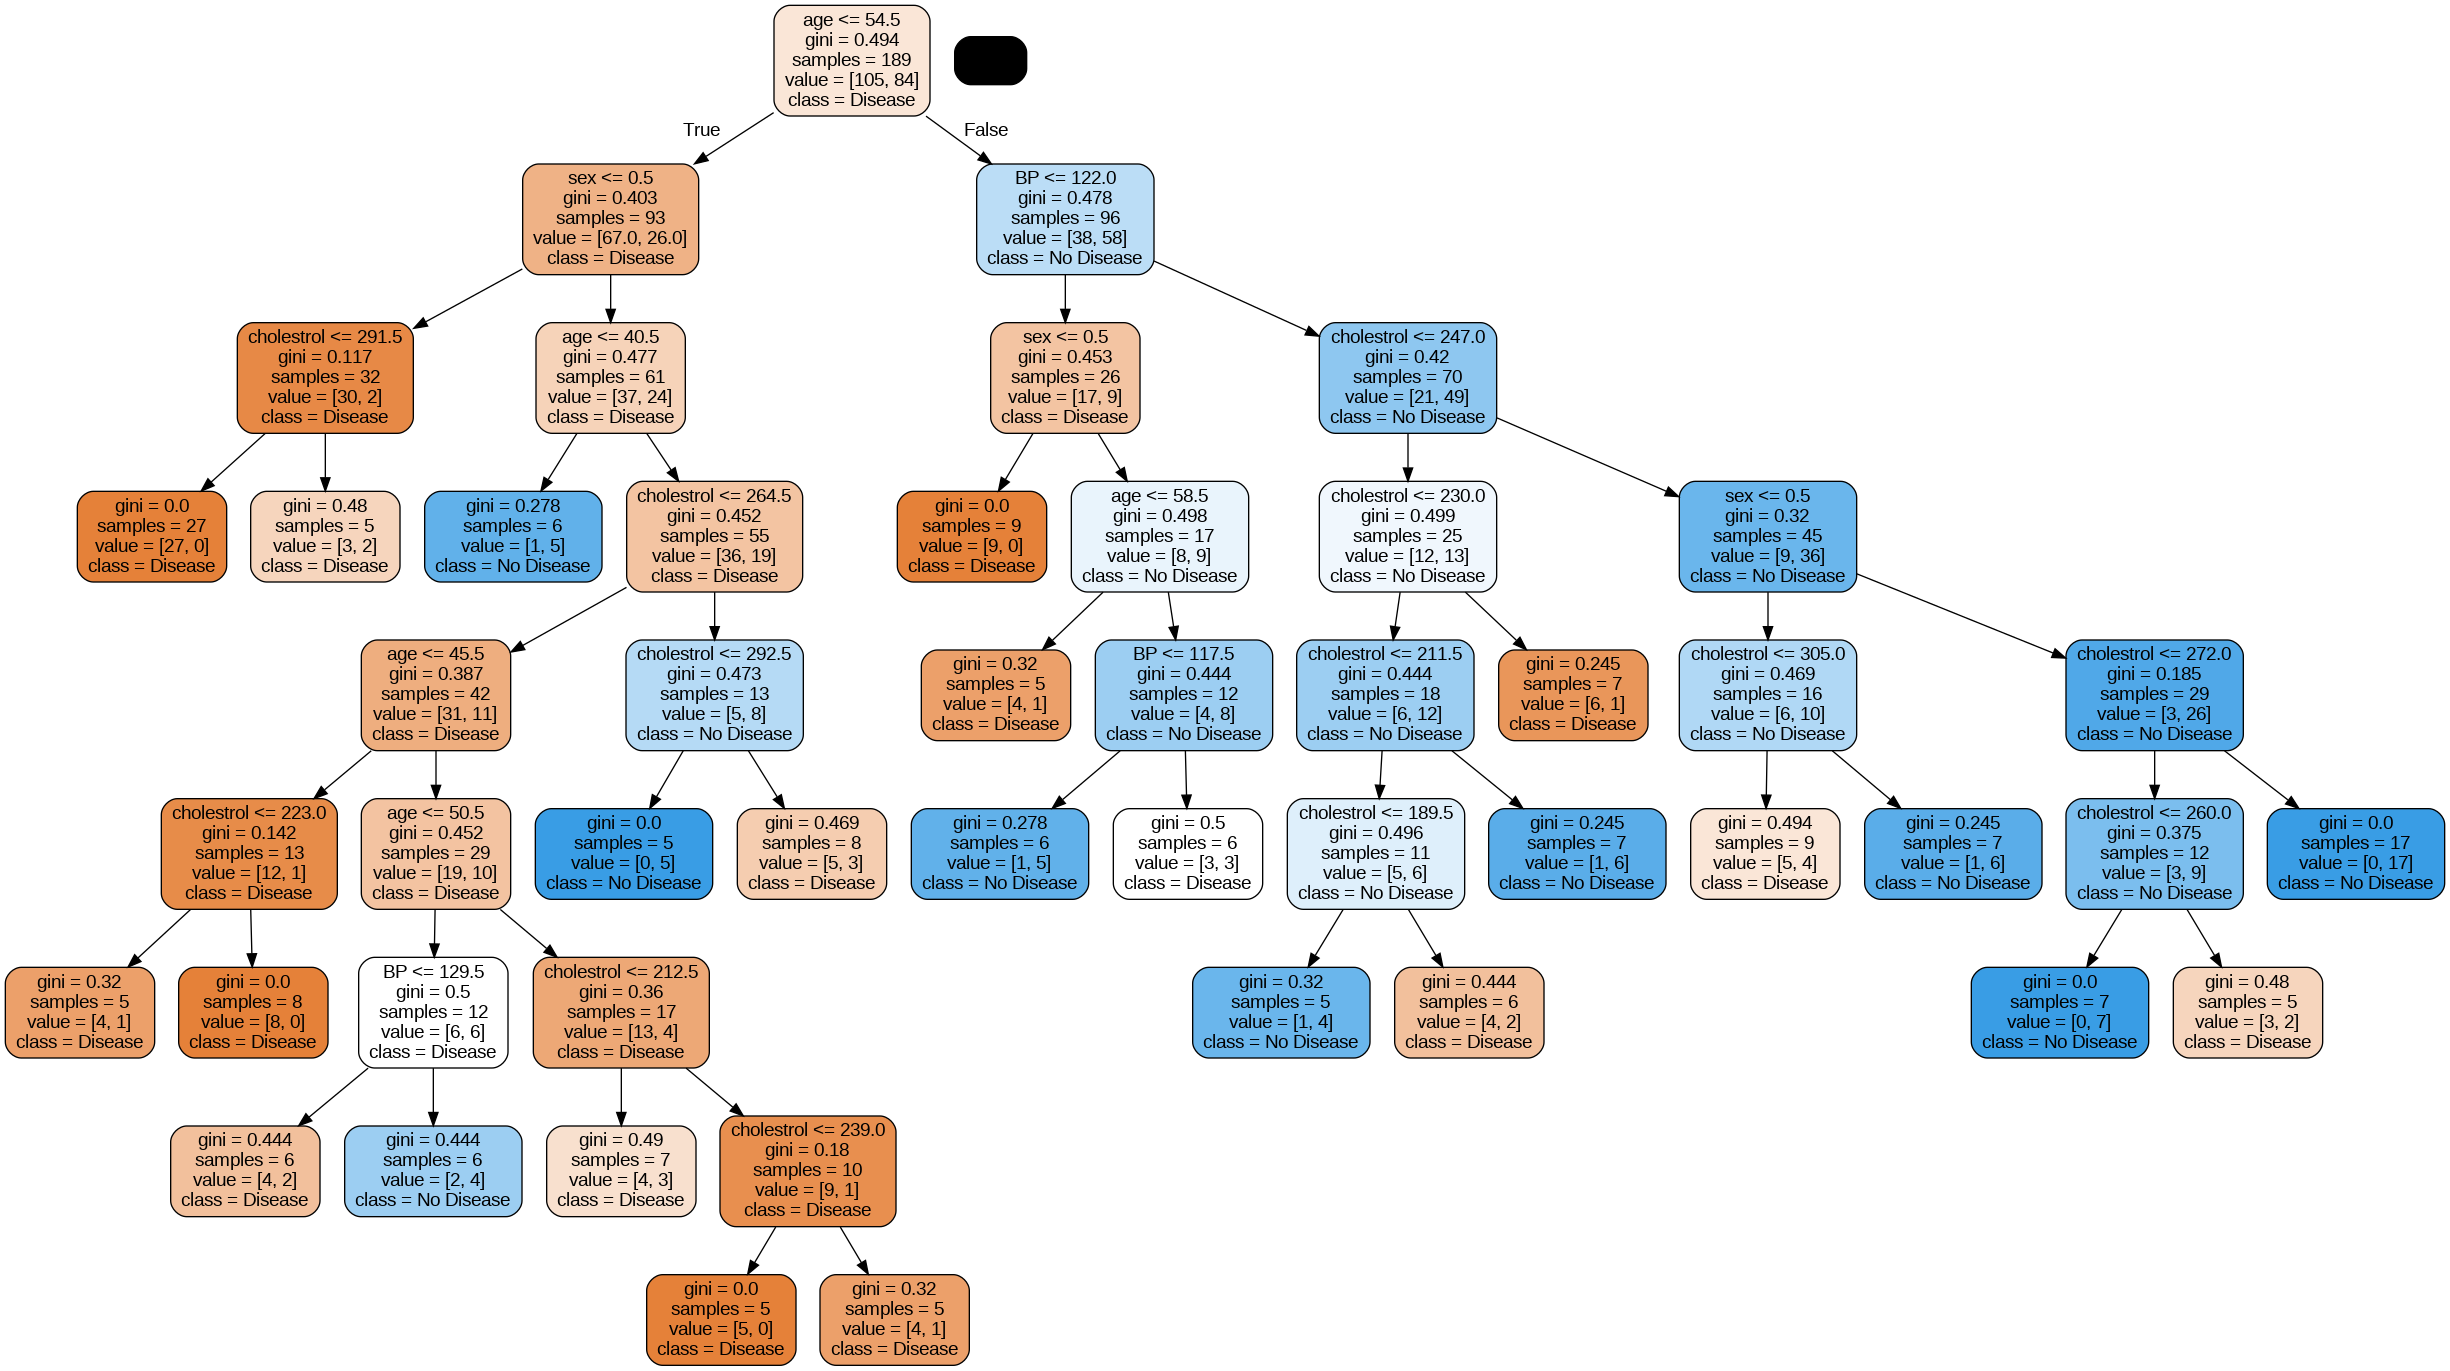

In [47]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())